# LDA topic modelling and similarity

make a list of all test articles filenames

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
mypath_w="D:/Competitions/AmEx/Dataset/test-data/"
onlyfiles_ew = [f for f in listdir(mypath_w) if isfile(join(mypath_w, f))]

Loading train data

In [2]:
import os
train_set=pd.DataFrame()
mypath_w="D:/Competitions/AmEx/Dataset/training-data/"
onlyfiles_ew = [f for f in listdir(mypath_w) if isfile(join(mypath_w, f))]
train_set['file_name']=onlyfiles_ew
os.chdir(mypath_w)
articles_train=[]
for fname in onlyfiles_ew:
    with open(fname) as infile:
        articles_train.append(infile.read())
train_set['articles']=articles_train
train_sol=pd.read_csv("D:/Competitions/AmEx/Dataset/train_data_segments.csv")
train_final=pd.merge(train_set,train_sol,how='left',on='file_name')
train_final["articles_new"]=train_final["articles"].str.split('-----')

In [3]:
train_final.isna().sum()

file_name       0
articles        0
segments        0
articles_new    0
dtype: int64

In [104]:
train_final.head()

file_name                                           articles  \
0  across_10000.txt  50780\tIn this case, Sallie Mae will use about...   
1  across_10044.txt  51002\tNEW YORK  (Reuters) - A weekly gauge of...   
2  across_10062.txt  51093\tNEW YORK  (Reuters) - It is "virtually ...   
3  across_10063.txt  51098\t"They're probably not going to make a h...   
4  across_10068.txt  51123\tNEW YORK  (Reuters) - The U.S. non-manu...   

                segments                                       articles_new  
0    1-367-711-1087-1558  [50780\tIn this case, Sallie Mae will use abou...  
1   1-674-1196-1624-2009  [51002\tNEW YORK  (Reuters) - A weekly gauge o...  
2     1-350-628-987-1373  [51093\tNEW YORK  (Reuters) - It is "virtually...  
3    1-336-722-1064-1375  [51098\t"They're probably not going to make a ...  
4    1-429-771-1112-1600  [51123\tNEW YORK  (Reuters) - The U.S. non-man...

Dividing the train articles by topics and make an LDA data set for topic modelling

In [4]:
slist =[]
for x in train_final.articles_new:
    slist.extend(x)

In [5]:
train_for_lda=pd.DataFrame()
train_for_lda['articles']=slist

Loading Validation and Test Data

In [6]:
validation_set=pd.DataFrame()
mypath_w="D:/Competitions/AmEx/Dataset/val-data/"
onlyfiles_ew = [f for f in listdir(mypath_w) if isfile(join(mypath_w, f))]
b=onlyfiles_ew.index('.DS_Store')
del onlyfiles_ew[b]
validation_set['file_name']=onlyfiles_ew
os.chdir(mypath_w)
articles_valid=[]
for fname in onlyfiles_ew:
    with open(fname) as infile:
        articles_valid.append(infile.read())
validation_set['articles']=articles_valid
validation_sol=pd.read_csv("D:/Competitions/AmEx/Dataset/val_data_segments.csv")
val_final=pd.merge(validation_set,validation_sol,how='left',on='file_name')
val_final.isna().sum()

file_name    0
articles     0
segments     0
dtype: int64

In [105]:
val_final.head()

file_name                                           articles  \
0  within_100061.txt  The GAO report came at a time of tight governm...   
1  within_100117.txt  WASHINGTON  (Reuters) - The U.S. Supreme Court...   
2  within_100154.txt  Boulton is charged with upholding the 2012 fin...   
3  within_100166.txt  The IRS' proposed guidance will be open for a ...   
4  within_100171.txt  Italy's anti-trust authority said Unipol must ...   

               segments  
0        1-408-834-1123  
1   1-480-858-1193-1758  
2   1-445-769-1116-1481  
3   1-404-950-1324-1845  
4        1-470-776-1118

In [106]:
val_final["articles_new"]=val_final["articles"].str.split('-----')

In [110]:
len(val_final)

151

In [111]:
len(train_final)

2234

In [107]:
for x in val_final.articles_new:
    slist.extend(x)

In [108]:
train_for_lda=pd.DataFrame()
train_for_lda['articles']=slist

In [109]:
len(train_for_lda)

12125

In [122]:
test_set=pd.DataFrame()
mypath_w="D:/Competitions/AmEx/Dataset/test-data/"
onlyfiles_ew = [f for f in listdir(mypath_w) if isfile(join(mypath_w, f))]
#b=onlyfiles_ew.index('.DS_Store')
#del onlyfiles_ew[b]
test_set['file_name']=onlyfiles_ew
os.chdir(mypath_w)
articles_test=[]
for fname in onlyfiles_ew:
    with open(fname) as infile:
        articles_test.append(infile.read())
test_set['articles']=articles_test
#validation_sol=pd.read_csv("D:/Competitions/AmEx/Dataset/val_data_segments.csv")
#val_final=pd.merge(validation_set,validation_sol,how='left',on='file_name')
test_set.isna().sum()

file_name    0
articles     0
dtype: int64

In [8]:
del validation_sol,validation_set,train_sol,train_set

Splitting the test set by fullstop sign and counting the number of splits

In [9]:
import gc
gc.collect()

311

In [123]:
test_set["articles_new"]=test_set["articles"].str.split('.')

In [124]:
test_set['list_cnt']=0
for i in range(len(test_set)):
    test_set['list_cnt'][i]=len(test_set['articles_new'][i])

C:\Users\Pratyusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
slist_test =[]
for x in test_set.articles_new:
    slist_test.extend(x)

Creating the index column of filenames for the split dataset

In [126]:
list_index=[]
for i in range(len(test_set)):
    for j in range(test_set['list_cnt'][i]):
        list_index.append(test_set['file_name'][i])

In [127]:
test_for_lda=pd.DataFrame()
test_for_lda['articles']=slist_test
test_for_lda['filename']=list_index
test_for_lda.head()

articles    filename
0  Natixis was created in December 2006 following...  test_1.txt
1   French mutual banks Banque Populaire and Cais...  test_1.txt
2   The banks recapitalized the Natixis-owned CIF...  test_1.txt
3  BMW expects to have parts to repair the recall...  test_1.txt
4   BMW said that it was not aware of any injurie...  test_1.txt

Now that the data preparation is done we do data cleaning using nltk package

In [15]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\Pratyusha\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))

In [112]:
train_for_lda["articles_clean"]=""
for i in range(len(train_for_lda)):
    train_for_lda["articles_clean"][i]=apply_all(train_for_lda["articles"][i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720


5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381


6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028


8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677


10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
1027

11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
1166

In [18]:
test_for_lda=test_for_lda.reset_index()

In [128]:
test_for_lda["articles_clean"]=""
for i in range(len(test_for_lda)):
    test_for_lda["articles_clean"][i]=apply_all(test_for_lda["articles"][i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505


4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590


In [129]:
test_for_lda.head()

articles    filename  \
0  Natixis was created in December 2006 following...  test_1.txt   
1   French mutual banks Banque Populaire and Cais...  test_1.txt   
2   The banks recapitalized the Natixis-owned CIF...  test_1.txt   
3  BMW expects to have parts to repair the recall...  test_1.txt   
4   BMW said that it was not aware of any injurie...  test_1.txt   

                                      articles_clean  
0  [natixi, creat, decemb, follow, merger, banqu,...  
1  [french, mutual, bank, banqu, populair, caiss,...  
2  [bank, recapit, natixisown, cifg, bond, insur,...  
3  [bmw, expect, part, repair, recal, vehicl, sta...  
4  [bmw, said, awar, injuri, accid, relat, issu, ...

In [21]:
test_for_lda=test_for_lda.drop('index',axis=1)

Looking at word frequency

In [130]:
word_list=[]
for x in train_for_lda.articles_clean:
    word_list.extend(x)
word_list_dup=word_list
from collections import Counter
word_list_series=Counter(word_list_dup)

Training the LDA model

In [191]:
def train_lda(data):
    """
    This function trains the lda model
    We setup parameters like number of topics, the chunksize to use in Hoffman method
    We also do 2 passes of the data since this is a small dataset, so we want the distributions to stabilize
    """
    num_topics = 100
    chunksize = 300
    dictionary = corpora.Dictionary(data['articles_clean'])
    corpus = [dictionary.doc2bow(doc) for doc in data['articles_clean']]
    t1 = time.time()
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low eta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=1e-3, eta=0.5e-3, chunksize=chunksize, minimum_probability=0.0, passes=3)
    t2 = time.time()
    print("Time to train LDA model on ", len(data), "articles: ", (t2-t1)/60, "min")
    return dictionary,corpus,lda

In [192]:
dictionary = corpora.Dictionary(train_for_lda['articles_clean'])

In [194]:
dictionary,corpus,lda = train_lda(train_for_lda)

C:\Users\Pratyusha\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Time to train LDA model on  12125 articles:  4.6229446490605675 min


In [158]:
#see top 10 topics
lda.show_topics(num_topics=10, num_words=20)

[(73,
  '0.363*"manag" + 0.235*"cost" + 0.166*"end" + 0.091*"effect" + 0.078*"due" + 0.045*"said" + 0.020*"chicago" + 0.000*"daysbefor" + 0.000*"sametim" + 0.000*"tannenbaum" + 0.000*"theprolong" + 0.000*"uscentr" + 0.000*"apoint" + 0.000*"harrah" + 0.000*"patchnot" + 0.000*"bernankestestimoni" + 0.000*"keeppric" + 0.000*"saidgrowth" + 0.000*"alreadyweak" + 0.000*"andmonetari"'),
 (92,
  '0.524*"would" + 0.277*"said" + 0.099*"call" + 0.075*"result" + 0.022*"event" + 0.000*"aresearch" + 0.000*"patchnot" + 0.000*"keeppric" + 0.000*"alreadyweak" + 0.000*"onwheth" + 0.000*"bernankestestimoni" + 0.000*"apoint" + 0.000*"chop" + 0.000*"daysbefor" + 0.000*"fedi" + 0.000*"halfpointcut" + 0.000*"markinfl" + 0.000*"monetarypolici" + 0.000*"isstruggl" + 0.000*"itselfhav"'),
 (61,
  '0.000*"sametim" + 0.000*"mrbernank" + 0.000*"ofsluggish" + 0.000*"inpric" + 0.000*"indexreleas" + 0.000*"aresearch" + 0.000*"andmonetari" + 0.000*"markinfl" + 0.000*"tannenbaum" + 0.000*"theprolong" + 0.000*"uscentr" +

In [159]:
#saving the model
from gensim.test.utils import datapath
fname = datapath("D:/Competitions/AmEx/Dataset-PB1/model_30")
lda.save(fname)

In [22]:
from gensim.test.utils import datapath
fname = datapath("D:/Competitions/AmEx/Dataset-PB1/model_100_1")
lda = LdaModel.load(fname, mmap='r')

In [131]:
test_for_lda['articles_len']=test_for_lda['articles'].str.len()

Considering the articles which only have more than 40 characters for topic modelling and creating a copy of the original test set

In [132]:
test_for_lda_copy=test_for_lda
test_for_lda=test_for_lda.loc[test_for_lda['articles_len']>40]

In [134]:
len(test_for_lda_copy)

5891

In [135]:
test_for_lda_list=list(test_for_lda.articles_clean)

In [172]:
#other_corpus

Getting topic loading for the test data for the calculation of the topic similarity

In [200]:
import numpy as np
other_corpus = [dictionary.doc2bow(text) for text in test_for_lda_list]
unseen_doc = other_corpus[0]
vector = lda[unseen_doc]
columns=[tup[0] for tup in lda.get_document_topics(bow=vector)]
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=vector)])
similarity=pd.DataFrame(new_doc_distribution.reshape(-1, len(new_doc_distribution)),columns=columns)
for i in range(len(other_corpus)):
    unseen_doc = other_corpus[int(i+1)]
    vector = lda[unseen_doc]
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=vector)])
    similarity.loc[int(i+1)]=new_doc_distribution
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716


IndexError: list index out of range

In [201]:
similarity.head()

0         1         2         3         4         5         6   \
0  0.001006  0.001006  0.001006  0.001006  0.001006  0.001006  0.001006   
1  0.000916  0.092858  0.000916  0.000916  0.000916  0.000916  0.000916   
2  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915   
3  0.001120  0.001120  0.001120  0.001120  0.001120  0.001120  0.001120   
4  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915   

         7         8         9     ...           90        91        92  \
0  0.101646  0.001006  0.001006    ...     0.001006  0.001006  0.001006   
1  0.000916  0.000916  0.000916    ...     0.000916  0.000916  0.000916   
2  0.000915  0.000915  0.000915    ...     0.000915  0.000915  0.000915   
3  0.001120  0.001120  0.001120    ...     0.001120  0.001120  0.001120   
4  0.000915  0.000915  0.000915    ...     0.000915  0.000915  0.000915   

         93        94        95        96        97        98        99  
0  0.001006  0.001006  0.001006  0.001006  0.001006  0.001006  0.001006  
1  0.000916  0.000916  0.000916  0.000916  0.000916  0.000916  0.000916  
2  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  
3  0.001120  0.001120  0.001120  0.001120  0.001120  0.001120  0.001120  
4  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  0.000915  

[5 rows x 100 columns]

In [137]:
list_names=list(test_for_lda.filename.unique())

Calculating the similarity

In [138]:
names=test_for_lda[['filename']].reset_index()
similarity_1=pd.concat([names,similarity],axis=1)

In [139]:
similarity_result=dict(tuple(similarity_1.groupby('filename')))

In [43]:
#similarity_result[list_names[0]].iloc[i,2:]

Calculating Cosine similarity of the topic loadings for different sentences

In [140]:
sim=[]
from scipy import spatial
for f in list_names:
    print(f)
    for i in range(int(len(similarity_result[f])-1)):
        #print(i)
        result = spatial.distance.cosine(list(similarity_result[f].iloc[i,2:]), list(similarity_result[f].iloc[i+1,2:]))
        sim.append(result)
    sim.append(int(0))

test_1.txt
test_10.txt
test_100.txt
test_101.txt
test_102.txt
test_103.txt
test_104.txt
test_105.txt
test_106.txt
test_107.txt
test_108.txt
test_109.txt
test_11.txt
test_110.txt
test_111.txt
test_112.txt
test_113.txt
test_114.txt
test_115.txt
test_116.txt
test_117.txt
test_118.txt
test_119.txt
test_12.txt
test_120.txt
test_121.txt
test_122.txt
test_123.txt
test_124.txt
test_125.txt
test_126.txt
test_127.txt
test_128.txt
test_129.txt
test_13.txt
test_130.txt
test_131.txt
test_132.txt
test_133.txt
test_134.txt
test_135.txt
test_136.txt
test_137.txt
test_138.txt
test_139.txt
test_14.txt
test_140.txt
test_141.txt
test_142.txt
test_143.txt
test_144.txt
test_145.txt
test_146.txt
test_147.txt
test_148.txt
test_149.txt
test_15.txt
test_150.txt
test_151.txt
test_152.txt
test_153.txt
test_154.txt
test_155.txt
test_156.txt
test_157.txt
test_158.txt
test_159.txt
test_16.txt
test_160.txt
test_161.txt
test_162.txt
test_163.txt
test_164.txt
test_165.txt
test_166.txt
test_167.txt
test_168.txt
test_169

In [141]:
test_for_lda['cosine_sim']=sim

C:\Users\Pratyusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([ 273.,    1.,    3.,   13.,   11.,   13.,   30.,   43.,   57.,
          97.,  106.,  154.,  164.,  248.,  266.,  335.,  385.,  372.,
         228.,  963.]),
 array([ -2.38418579e-07,   4.98150734e-02,   9.96303852e-02,
          1.49445697e-01,   1.99261009e-01,   2.49076321e-01,
          2.98891632e-01,   3.48706944e-01,   3.98522256e-01,
          4.48337568e-01,   4.98152880e-01,   5.47968191e-01,
          5.97783503e-01,   6.47598815e-01,   6.97414127e-01,
          7.47229439e-01,   7.97044750e-01,   8.46860062e-01,
          8.96675374e-01,   9.46490686e-01,   9.96305998e-01]),
 <a list of 20 Patch objects>)

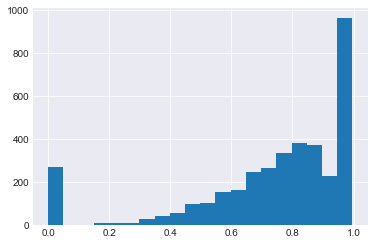

In [142]:
%matplotlib inline
plt.hist(test_for_lda.cosine_sim,bins=20)

In [143]:
test_for_lda['rank']=test_for_lda.groupby('filename')['cosine_sim'].rank(method='dense').astype(int)

C:\Users\Pratyusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
test_for_lda=test_for_lda.reset_index()
test_for_lda=test_for_lda.drop('index',axis=1)

In [145]:
#no of splits we want per topic
test_for_lda['flag']=0
for i in range(len(test_for_lda)):
    if test_for_lda['rank'][i]<5:
        test_for_lda['flag'][i]=1
    print(i)

C:\Users\Pratyusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


In [150]:
test_for_lda_copy=pd.merge(test_for_lda_copy,test_for_lda[['articles','flag']],on='articles',how='left')
test_for_lda_copy=test_for_lda_copy.fillna(0)

In [151]:
test_for_lda.head()

articles    filename  \
0  Natixis was created in December 2006 following...  test_1.txt   
1   French mutual banks Banque Populaire and Cais...  test_1.txt   
2   The banks recapitalized the Natixis-owned CIF...  test_1.txt   
3  BMW expects to have parts to repair the recall...  test_1.txt   
4   BMW said that it was not aware of any injurie...  test_1.txt   

                                      articles_clean  articles_len  \
0  [natixi, creat, decemb, follow, merger, banqu,...           160   
1  [french, mutual, bank, banqu, populair, caiss,...           115   
2  [bank, recapit, natixisown, cifg, bond, insur,...            99   
3  [bmw, expect, part, repair, recal, vehicl, sta...            87   
4  [bmw, said, awar, injuri, accid, relat, issu, ...           181   

   cosine_sim  rank  flag  
0    0.668732     3     1  
1    0.985579    13     0  
2    0.987284    15     0  
3    0.913646    10     0  
4    0.985452    12     0

In [148]:
test_for_lda_copy=test_for_lda_copy.drop(['flag'],axis=1)

In [152]:
man_csv=test_for_lda_copy[['filename','flag','articles_len']]

In [153]:
man_csv.head(20)

filename  flag  articles_len
0    test_1.txt   1.0           160
1    test_1.txt   0.0           115
2    test_1.txt   0.0            99
3    test_1.txt   0.0            87
4    test_1.txt   0.0           181
5    test_1.txt   0.0           183
6    test_1.txt   0.0           125
7    test_1.txt   0.0           256
8    test_1.txt   0.0            56
9    test_1.txt   1.0           196
10   test_1.txt   1.0           145
11   test_1.txt   0.0            46
12   test_1.txt   0.0           102
13   test_1.txt   0.0            18
14   test_1.txt   0.0           144
15   test_1.txt   1.0            79
16   test_1.txt   0.0             0
17  test_10.txt   1.0           268
18  test_10.txt   1.0            79
19  test_10.txt   0.0           250

In [154]:
man_csv=man_csv.loc[man_csv.articles_len>0]
man_csv['flag_shifted']=man_csv.groupby(['filename'])['flag'].shift(1)
man_csv=man_csv.fillna(0)
man_csv['cumulative'] = man_csv.groupby(['filename'])['flag_shifted'].apply(lambda x: x.cumsum())

In [198]:
man_csv['cumulative_article_len'] = man_csv.groupby(['filename'])['articles_len'].apply(lambda x: x.cumsum())

In [199]:
sub=man_csv[['filename','cumulative','cumulative_article_len']].groupby(['filename','cumulative']).max()
sub=pd.DataFrame(sub.to_records())
sub_final=sub.groupby('filename')['cumulative_article_len'].apply(list)
sub_final=pd.DataFrame(sub_final)
sub_final=pd.DataFrame(sub_final.to_records())
sub_final.columns=['file_name','segments']
sub_final.to_csv('D:/Competitions/AmEx/Dataset-PB1/sub_final_cosine_val_cumm.csv',index=False)

In [93]:
#sub_final.to_csv('D:/Competitions/AmEx/Dataset-PB1/sub_final_cosine_250.csv',index=False)

Testing for euclidean distance assuming LDA give normal topic distributions with scipy.spatial.distance.euclidean(u, v)

In [202]:
sim_euclidean=[]
from scipy import spatial
for f in list_names:
    print(f)
    for i in range(int(len(similarity_result[f])-1)):
        #print(i)
        result = spatial.distance.euclidean(list(similarity_result[f].iloc[i,2:]), list(similarity_result[f].iloc[i+1,2:]))
        sim_euclidean.append(result)
    sim_euclidean.append(int(0))

test_1.txt
test_10.txt
test_100.txt
test_101.txt
test_102.txt
test_103.txt
test_104.txt
test_105.txt
test_106.txt
test_107.txt
test_108.txt
test_109.txt
test_11.txt
test_110.txt
test_111.txt
test_112.txt
test_113.txt
test_114.txt
test_115.txt
test_116.txt
test_117.txt
test_118.txt
test_119.txt
test_12.txt
test_120.txt
test_121.txt
test_122.txt
test_123.txt
test_124.txt
test_125.txt
test_126.txt
test_127.txt
test_128.txt
test_129.txt
test_13.txt
test_130.txt
test_131.txt
test_132.txt
test_133.txt
test_134.txt
test_135.txt
test_136.txt
test_137.txt
test_138.txt
test_139.txt
test_14.txt
test_140.txt
test_141.txt
test_142.txt
test_143.txt
test_144.txt
test_145.txt
test_146.txt
test_147.txt
test_148.txt
test_149.txt
test_15.txt
test_150.txt
test_151.txt
test_152.txt
test_153.txt
test_154.txt
test_155.txt
test_156.txt
test_157.txt
test_158.txt
test_159.txt
test_16.txt
test_160.txt
test_161.txt
test_162.txt
test_163.txt
test_164.txt
test_165.txt
test_166.txt
test_167.txt
test_168.txt
test_169

In [203]:
test_for_lda['euclidean_sim']=sim_euclidean

(array([ 272.,    0.,    0.,    6.,   72.,  296.,  569.,  663.,  580.,
         506.,  316.,  208.,  131.,   73.,   24.,   14.,   23.,    5.,
           3.,    1.]),
 array([ 0.        ,  0.05329875,  0.10659751,  0.15989626,  0.21319501,
         0.26649377,  0.31979252,  0.37309127,  0.42639003,  0.47968878,
         0.53298753,  0.58628629,  0.63958504,  0.6928838 ,  0.74618255,
         0.7994813 ,  0.85278006,  0.90607881,  0.95937756,  1.01267632,
         1.06597507]),
 <a list of 20 Patch objects>)

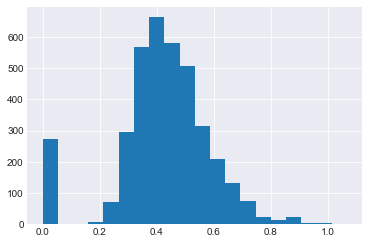

In [204]:
%matplotlib inline
plt.hist(test_for_lda.euclidean_sim,bins=20)

In [205]:
test_for_lda['rank_euclidean']=test_for_lda.groupby('filename')['euclidean_sim'].rank(method='dense').astype(int)

In [206]:
test_for_lda=test_for_lda.reset_index()
test_for_lda=test_for_lda.drop('index',axis=1)

In [207]:
#no of splits we want per topic
test_for_lda['flag_euclidean']=0
for i in range(len(test_for_lda)):
    if test_for_lda['rank_euclidean'][i]<5:
        test_for_lda['flag_euclidean'][i]=1
    print(i)

C:\Users\Pratyusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699


In [209]:
#test_for_lda_copy=test_for_lda_copy.drop('flag_euclidean',axis=1)

In [210]:
test_for_lda_copy=pd.merge(test_for_lda_copy,test_for_lda[['articles','flag_euclidean']],on='articles',how='left')
test_for_lda_copy=test_for_lda_copy.fillna(0)

In [211]:
man_csv=test_for_lda_copy[['filename','flag_euclidean','articles_len']]

In [212]:
man_csv=man_csv.loc[man_csv.articles_len>0]
man_csv['flag_euclidean_shifted']=man_csv.groupby(['filename'])['flag_euclidean'].shift(1)
man_csv=man_csv.fillna(0)
man_csv['cumulative'] = man_csv.groupby(['filename'])['flag_euclidean_shifted'].apply(lambda x: x.cumsum())

In [213]:
man_csv['cumulative_article_len'] = man_csv.groupby(['filename'])['articles_len'].apply(lambda x: x.cumsum())

In [214]:
sub=man_csv[['filename','cumulative','cumulative_article_len']].groupby(['filename','cumulative']).max()
sub=pd.DataFrame(sub.to_records())
sub_final=sub.groupby('filename')['cumulative_article_len'].apply(list)
sub_final=pd.DataFrame(sub_final)
sub_final=pd.DataFrame(sub_final.to_records())
sub_final.to_csv('D:/Competitions/AmEx/Dataset-PB1/sub_final_euclidean_finalcummulative.csv',index=False)